In [8]:
from dlib_models import load_dlib_models
import numpy as np
# this loads the dlib models into memory. You should only import the models *after* loading them.
# This does lazy-loading: it doesn't do anything if the models are already loaded.
load_dlib_models()

from dlib_models import models

face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

<IPython.core.display.Javascript object>


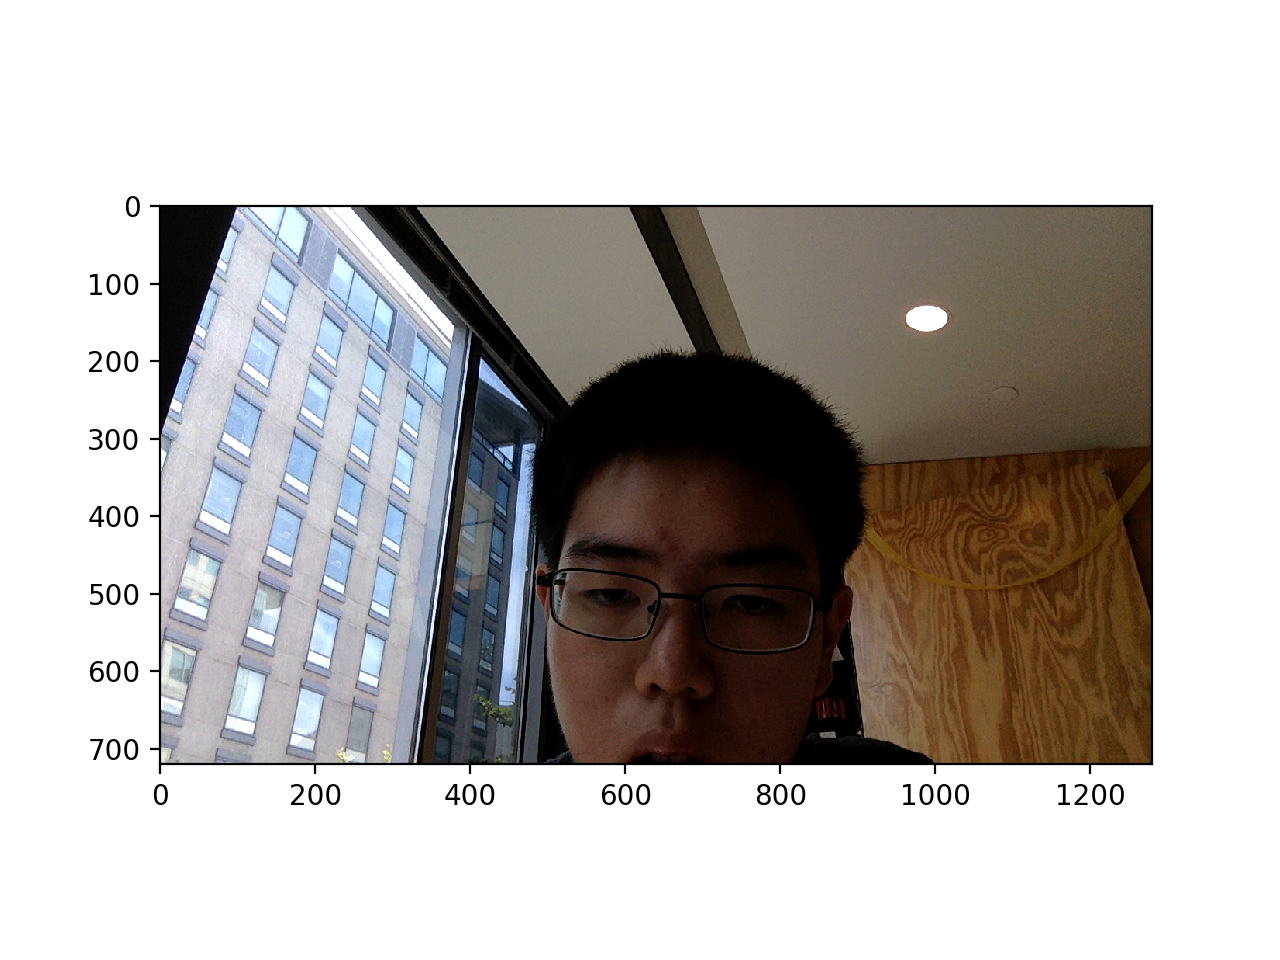

In [4]:
%matplotlib notebook
import camera
from camera import take_picture
import matplotlib.pyplot as plt
img_array = take_picture()

fig,ax = plt.subplots()
ax.imshow(img_array)

In [15]:
import skimage.io as io
# read a picture in as a numpy-array
img_array = io.imread("/Users/victor/BWSI/Week2/Cogworks_Visual/photos/images.jpg")  # ensure this has shape (H, W, 3)
                                                  # otherwise, fix it!

In [16]:
face_detect = models["face detect"]

# Number of times to upscale image before detecting faces.
# When would you want to increase this number?
upscale = 1 

detections = face_detect(img_array, upscale)  # returns sequence of face-detections
detections = list(detections)

det = detections[0] # first detected face in image

# bounding box dimensions for detection
l, r, t, b = det.left(), det.right(), det.top(), det.bottom()  

In [10]:
shape_predictor = models["shape predict"]
shape = shape_predictor(img_array, det)

In [11]:
descriptor = np.array(face_rec_model.compute_face_descriptor(img_array, shape))


In [12]:
descriptor

array([ -1.18951194e-01,   1.03238210e-01,   8.23618025e-02,
         1.51345022e-02,  -4.24586609e-02,  -5.23845181e-02,
        -6.44739568e-02,  -1.17500030e-01,   1.27329543e-01,
        -1.08395740e-01,   2.03515962e-01,  -7.10161328e-02,
        -1.74327970e-01,  -7.82268122e-02,  -5.22108749e-02,
         1.93063661e-01,  -1.80904835e-01,  -1.00214407e-01,
        -7.77721852e-02,   1.05427392e-02,   1.18501619e-01,
        -4.76517707e-05,   4.83544692e-02,   3.50730680e-02,
        -8.18819925e-02,  -3.14081907e-01,  -1.23265825e-01,
        -8.72615278e-02,   2.15712842e-02,  -4.49334495e-02,
        -9.54536647e-02,  -5.93408849e-03,  -1.33069351e-01,
        -8.21314305e-02,  -1.08258345e-03,   7.24608973e-02,
        -3.03792171e-02,  -9.24184546e-02,   1.69058442e-01,
        -3.94156910e-02,  -2.26297572e-01,   2.25406028e-02,
         7.93655515e-02,   2.26475120e-01,   2.18978599e-01,
         9.95942280e-02,  -2.76532620e-02,  -1.42384872e-01,
         1.13950349e-01,